## El objetivo de este ejercicio es calcular la función de valor de una política dada usando sampleo Monte Carlo.
<img src="Prediccion_MC.PNG">

In [41]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [42]:
env = BlackjackEnv()

In [70]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Algoritmo de predicción Monte Carlo "primera-visita". Calcula la función de valor para una 
    politica dada usando sampleo.
    
    Argumentos:
        policy: Política, función que mapea observaciones a probabilidades de cada acción.
        env: Ambiente de OpenAI gyn.
        num_episodes: Número de episodios a samplear.
        discount_factor: factor de descuento gama.
    
    Retorna:
        Un diccionario que mapea estado -> valor.
        El estado es una tupla y el valor es un float.
    """

    # Mantiene una suma y conteo de los retornos de cada estado
    # para calcular un promedio. Podría usarse un array para guardar todos los retornos
    # pero sería ineficiente en memoria.
    # CUIDADO: las llaves de un diccionario deben ser inmutables, por ejemplo tuples
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # El valor final de la función de valor
    V = defaultdict(float)
    
    for ep in range(num_episodes):
        steps = []
        observation = env.reset()
        
        for t in range(100):
            observation_original = observation
            action = policy(observation)
            observation, reward, done, info = env.step(action)
            steps.append((observation_original, reward))
            if done:
                steps.append((observation, 0))
                break

        steps = np.array(steps)
        states = set(steps[:, 0])
                        
        for state in states:
            initial_t = np.argmax(states == state)            
            returns_sum[state] = 0
            
            for t in range(len(steps)-1, initial_t-1, -1):
                returns_sum[state] = steps[t, 1] + discount_factor * returns_sum[state]
                            
            if state in returns_count:
                returns_count[state] += 1
            else:
                returns_count[state] = 1
                        
            if state in V:
                V[state] += (returns_sum[state] - V[state]) / returns_count[state]
            else:
                V[state] = returns_sum[state]

    return V    

In [71]:
def sample_policy(observation):
    """
    Una política que se planta si el jugador tiene un puntaje > 20 y pide otra carta caso contrario.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

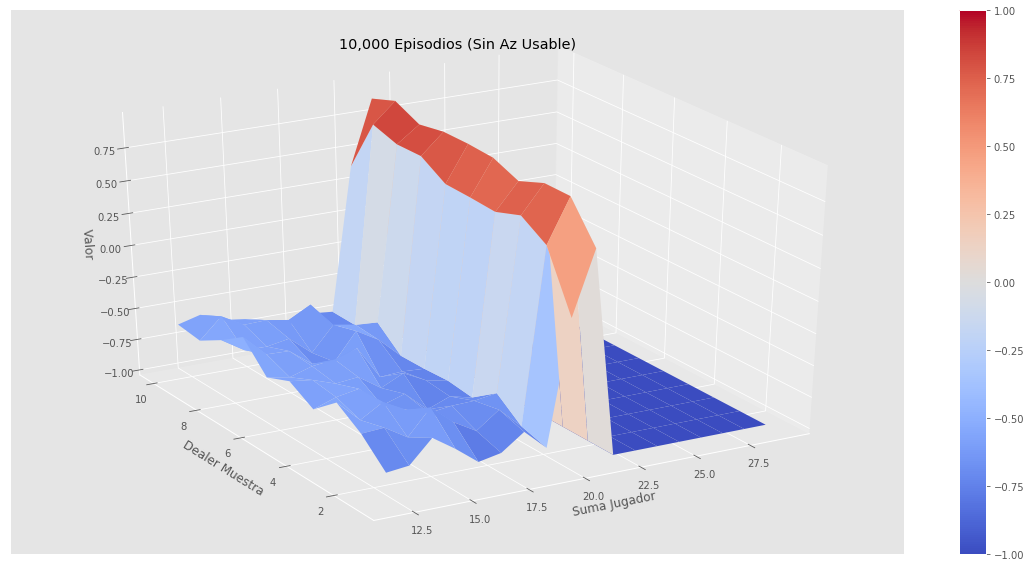

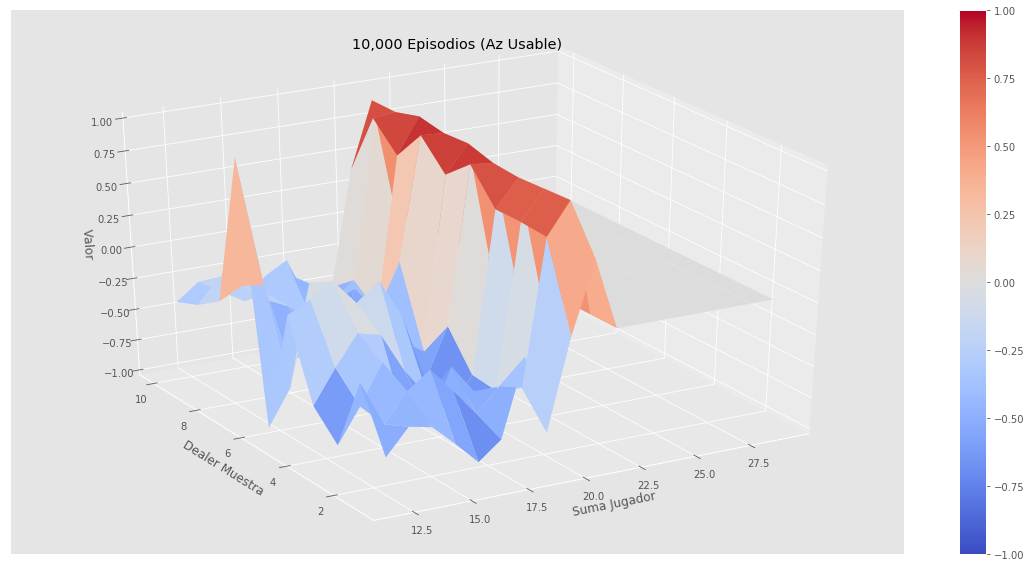

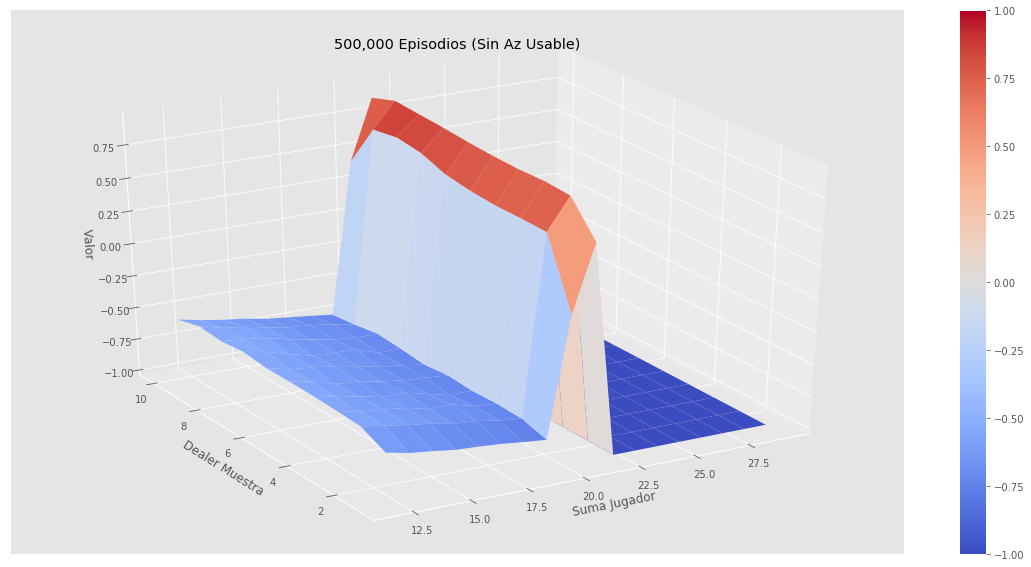

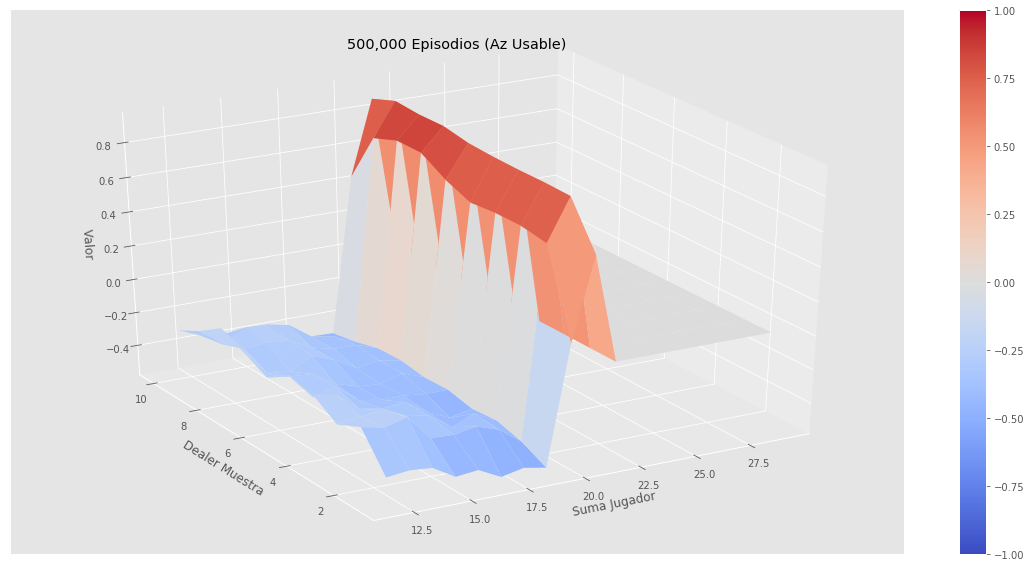

In [72]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Episodios")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Episodios")